In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wine_df = pd.read_csv('winequality-red.csv')

In [3]:
myX = np.array(wine_df.drop(columns = ['quality']))

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
sc = StandardScaler()
pca = PCA(n_components=5)

In [6]:
Xstd = sc.fit_transform(myX)

In [7]:
pca.fit(Xstd)

PCA(n_components=5)

In [8]:
xrange = np.linspace(1, 10, num=10)

Text(0, 0.5, 'cumulative explained variance')

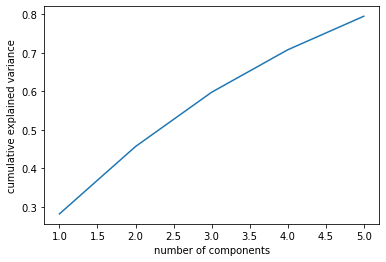

In [10]:
plt.plot(xrange[0:5], np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

<IPython.core.display.Javascript object>


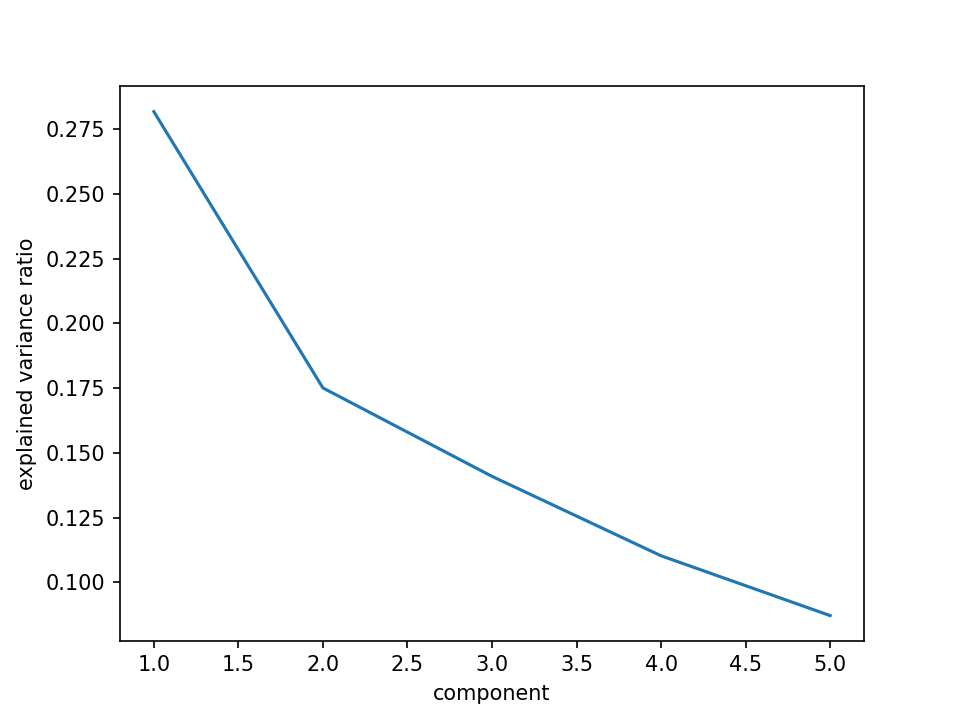

In [55]:
plt.plot(xrange[0:5],pca.explained_variance_ratio_)
plt.xlabel('component')
plt.ylabel('explained variance ratio')
plt.show()

In [9]:
pcadf = pd.DataFrame(pca.fit_transform(Xstd))

In [10]:
pca.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837])

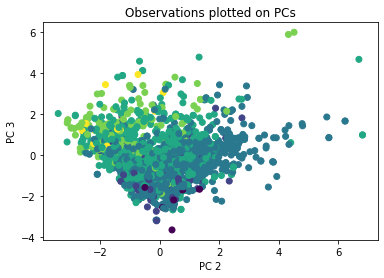

In [41]:
plt.scatter(pcadf.loc[:,1], pcadf.loc[:,2], c = wine_df['quality'], cmap = 'viridis')
plt.xlabel('PC 2')
plt.ylabel('PC 3')
plt.title('Observations plotted on PCs')
#plt.colorbar()
plt.show()

In [17]:
hilowines = wine_df[(wine_df['quality']>6) | (wine_df['quality']<5)]

In [18]:
corr = wine_df.corr()

In [19]:
import seaborn as sns

In [11]:
comps = pd.DataFrame(pca.components_)

In [12]:
comps.columns = wine_df.columns[0:11]

In [13]:
comps.T.sort_values(by=abs(comps.T.columns[2]), ascending = False).drop(columns = [0,1])

,2,3,4
alcohol,0.471673,-0.122181,0.350681
free sulfur dioxide,0.428793,-0.043538,-0.159152
total sulfur dioxide,0.322415,-0.034577,-0.222465
sulphates,0.279786,0.550872,0.225962
citric acid,0.238247,-0.079418,-0.058573
residual sugar,0.101283,-0.372793,0.732144
pH,0.057697,-0.003788,0.267530
chlorides,-0.092614,0.666195,0.246501
fixed acidity,-0.123302,-0.229617,-0.082614
density,-0.338871,-0.174500,0.157077


In [14]:
comp_vars = pd.DataFrame()
comp_vals = pd.DataFrame()
for col in comps.T.columns:
    sortname = 'comp'+str(col)
    sorted_comp = comps.T.sort_values(by=abs(comps.columns[col]), ascending=False).reset_index().rename(columns = {'index':sortname})
    comp_vars[sortname] = sorted_comp.loc[:, sortname]
    comp_vals[sortname] = comps.loc[col]
    #print(sorted_comp.head())

TypeError: bad operand type for abs(): 'str'

In [15]:
comp_vars_names = pd.DataFrame(columns = comp_vars.columns)
#counter = 0
for col in comp_vars.columns:
    mylist = comp_vars[col]
    mynames = wine_df.columns[mylist]
    col2name = str(col) + 'values'
    #print(mynames)
    for ii in range(0,3):
        comp_vars_names.loc[ii,col] = mynames[ii]
        #comp_vars_names.loc[ii, col2name] = sorted_comp.loc[comp_vars[]]
    #counter = counter +1

In [129]:
pca.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837])

In [17]:
hilowines = wine_df[(wine_df['quality']>6) | (wine_df['quality']<5)]

In [19]:
%matplotlib notebook

<IPython.core.display.Javascript object>


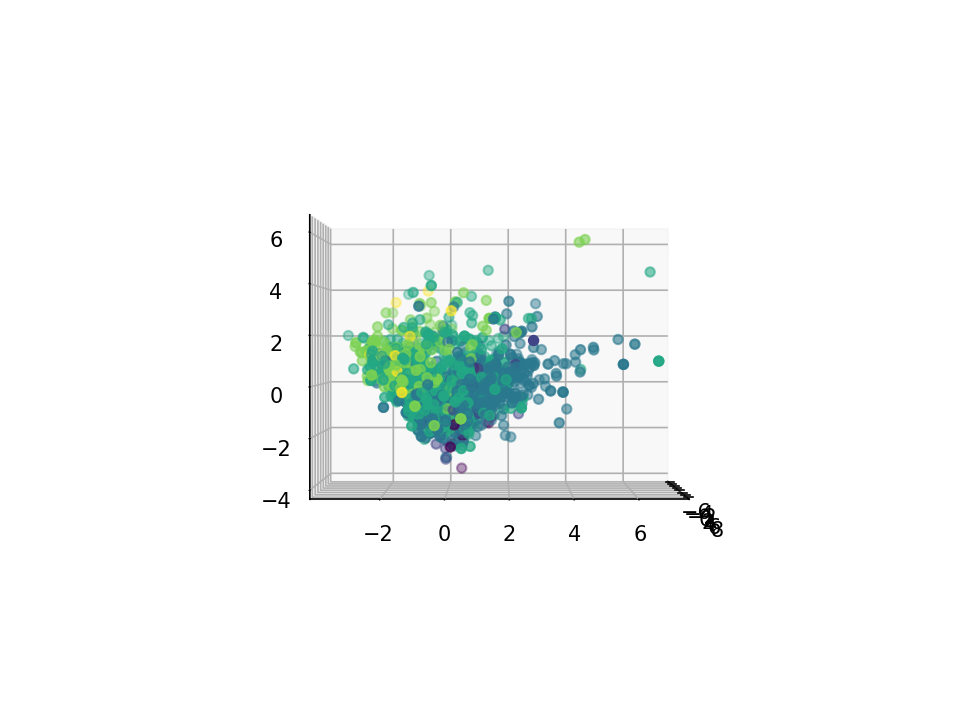

In [57]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pcadf.loc[:,0], pcadf.loc[:,1], pcadf.loc[:,2],c = wine_df['quality'], cmap='viridis')
plt.show()

In [1]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pcadf.loc[hilowines.index,0], pcadf.loc[hilowines.index,1], pcadf.loc[hilowines.index,2],c = hilowines['quality'], cmap='viridis')
plt.show()



NameError: name 'plt' is not defined

In [26]:
pearsonr(wine_df['quality'], pcadf.loc[:,0])

(0.11034929787171394, 9.749578010208338e-06)

In [27]:
pearsonr(wine_df['quality'], pcadf.loc[:,1])

(-0.38680246906124865, 3.226863196143725e-58)

In [28]:
pearsonr(wine_df['quality'], pcadf.loc[:,2])

(0.39927380944216867, 2.9790456332805242e-62)

In [29]:
pearsonr(wine_df['quality'], wine_df['alcohol'])

(0.476166324001136, 2.831476974778582e-91)

<IPython.core.display.Javascript object>


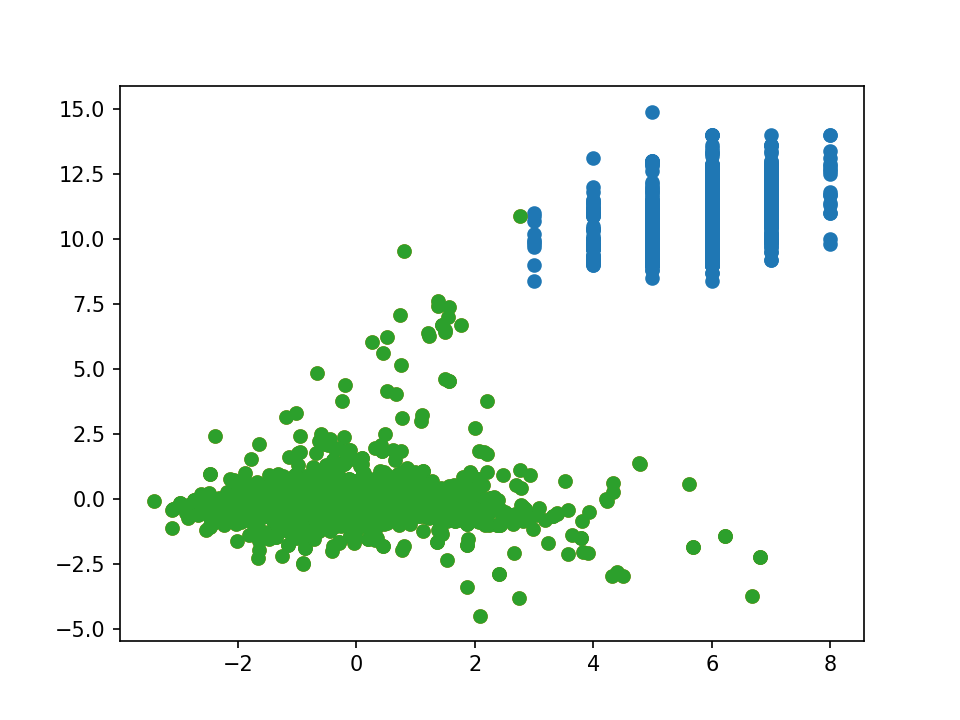

In [31]:
plt.scatter(wine_df['quality'], wine_df['alcohol'])

In [24]:
pcadf.corr()

,0,1,2,3,4
0,1.000000e+00,-1.684594e-17,-1.486133e-16,-2.173225e-16,-5.815789e-17
1,-1.684594e-17,1.000000e+00,2.351692e-16,-2.316097e-16,5.963830e-18
2,-1.486133e-16,2.351692e-16,1.000000e+00,-3.023205e-16,2.089346e-17
3,-2.173225e-16,-2.316097e-16,-3.023205e-16,1.000000e+00,-4.061744e-16
4,-5.815789e-17,5.963830e-18,2.089346e-17,-4.061744e-16,1.000000e+00


In [25]:
from scipy.stats import pearsonr

In [32]:
pearsonr(pcadf.loc[:,0], wine_df['quality'])

(0.11034929787171394, 9.749578010208338e-06)

In [33]:
pearsonr(pcadf.loc[:,1], wine_df['quality'])

(-0.38680246906124865, 3.226863196143725e-58)

In [34]:
pearsonr(pcadf.loc[:,2], wine_df['quality'])

(0.39927380944216867, 2.9790456332805242e-62)

In [38]:
pcX = np.array(pcadf.loc[:,0:2])

In [44]:
Y = np.array(wine_df['quality'])

In [45]:
lr.fit(pcX, Y)

LinearRegression()

In [46]:
lr.score(pcX, Y)

0.32121269251911977

In [47]:
lr.coef_

array([ 0.05060501, -0.22501699,  0.25886473])

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

<IPython.core.display.Javascript object>


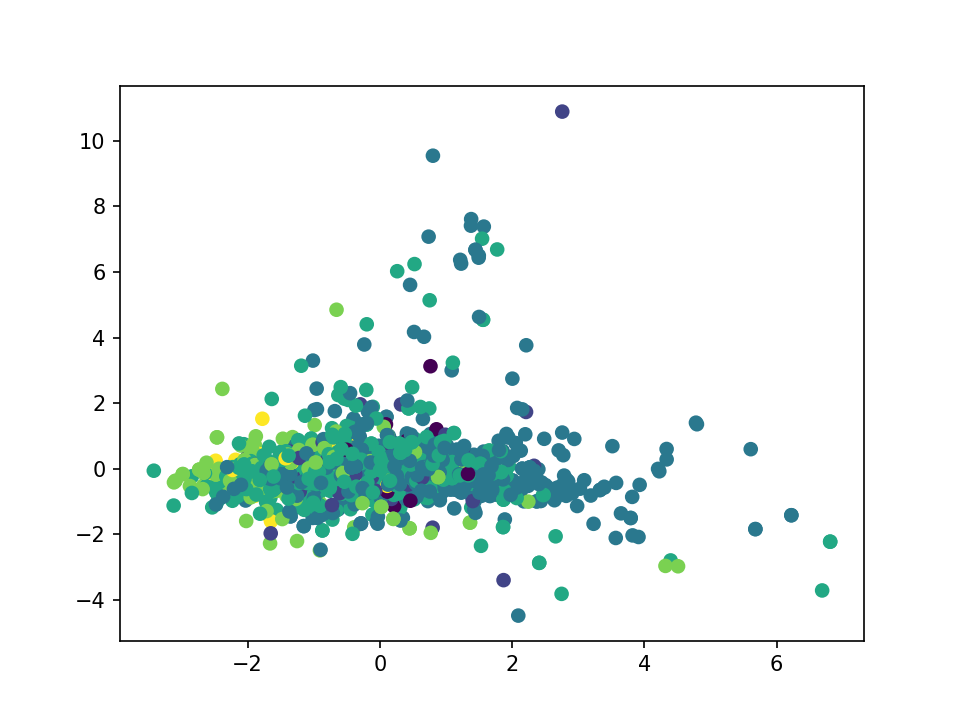

In [51]:
plt.scatter(pcadf.loc[:,1], pcadf.loc[:,3], c=wine_df['quality'], cmap='viridis')
plt.show()